In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import requests

from lts import LTSCell

In [4]:
url = 'http://api.scraperlink.com/investpy/?email=your@email.com&type=historical_data&product=cryptos&symbol=BTC&from_date=10/01/2013&to_date=2/1/2023'
response = requests.request('GET', url)
prices = response.json()['data']
data = pd.DataFrame(prices)

In [5]:
data.head()

,direction_color,rowDate,rowDateRaw,rowDateTimestamp,last_close,last_open,last_max,last_min,volume,volumeRaw,change_precent,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw,change_precentRaw
0,redFont,"Jan 02, 2023",1672617600,2023-01-02T00:00:00Z,"16,576.2","16,618.4","16,625.9","16,551.0",108.75K,108749,-0.25,16576.24804687500000,16618.40625000000000,16625.90039062500000,16550.99414062500000,-0.253684
1,greenFont,"Jan 01, 2023",1672531200,2023-01-01T00:00:00Z,"16,618.4","16,537.5","16,621.9","16,499.7",107.84K,107837,0.49,16618.40625000000000,16537.54296875000000,16621.89843750000000,16499.66601562500000,0.489668
2,redFont,"Dec 31, 2022",1672444800,2022-12-31T00:00:00Z,"16,537.4","16,607.2","16,635.9","16,487.3",130.44K,130440,-0.42,16537.42773437500000,16607.19921875000000,16635.91210937500000,16487.26757812500000,-0.420128
3,redFont,"Dec 30, 2022",1672358400,2022-12-30T00:00:00Z,"16,607.2","16,636.4","16,644.4","16,360.0",192.76K,192763,-0.18,16607.19921875000000,16636.41601562500000,16644.35351562500000,16360.02832031250000,-0.175620
4,greenFont,"Dec 29, 2022",1672272000,2022-12-29T00:00:00Z,"16,636.4","16,546.2","16,659.1","16,496.6",181.47K,181466,0.55,16636.41601562500000,16546.18554687500000,16659.05664062500000,16496.56250000000000,0.545194


In [6]:
# Remove unnecessary columns
data.drop(columns=[
  'direction_color',
  'rowDateRaw',
  'rowDateTimestamp',

  # Quantity of btc bought or sold
  'volume',
  'volumeRaw',
  'change_precent',
  'change_precentRaw',
  'last_close',
  'last_open',
  'last_max',
  'last_min'
  ],
  inplace=True
)

data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,"Jan 02, 2023",16576.24804687500000,16618.40625000000000,16625.90039062500000,16550.99414062500000
1,"Jan 01, 2023",16618.40625000000000,16537.54296875000000,16621.89843750000000,16499.66601562500000
2,"Dec 31, 2022",16537.42773437500000,16607.19921875000000,16635.91210937500000,16487.26757812500000
3,"Dec 30, 2022",16607.19921875000000,16636.41601562500000,16644.35351562500000,16360.02832031250000
4,"Dec 29, 2022",16636.41601562500000,16546.18554687500000,16659.05664062500000,16496.56250000000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rowDate        3381 non-null   object
 1   last_closeRaw  3381 non-null   object
 2   last_openRaw   3381 non-null   object
 3   last_maxRaw    3381 non-null   object
 4   last_minRaw    3381 non-null   object
dtypes: object(5)
memory usage: 132.2+ KB


In [8]:
data.isnull().sum()

rowDate          0
last_closeRaw    0
last_openRaw     0
last_maxRaw      0
last_minRaw      0
dtype: int64

In [9]:
# Convert date object to datetime
data['rowDate'] = pd.to_datetime(data['rowDate'])

# Convert values to floats
data = data.astype({
    'last_closeRaw': 'float',
    'last_openRaw': 'float',
    'last_maxRaw': 'float',
    'last_minRaw': 'float'
})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rowDate        3381 non-null   datetime64[ns]
 1   last_closeRaw  3381 non-null   float64       
 2   last_openRaw   3381 non-null   float64       
 3   last_maxRaw    3381 non-null   float64       
 4   last_minRaw    3381 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 132.2 KB


In [11]:
data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,2023-01-02,16576.248047,16618.406250,16625.900391,16550.994141
1,2023-01-01,16618.406250,16537.542969,16621.898438,16499.666016
2,2022-12-31,16537.427734,16607.199219,16635.912109,16487.267578
3,2022-12-30,16607.199219,16636.416016,16644.353516,16360.028320
4,2022-12-29,16636.416016,16546.185547,16659.056641,16496.562500


In [12]:
data.rename(
    columns={
        'last_closeRaw': 'close',
        'last_openRaw': 'open',
        'last_maxRaw': 'high',
        'last_minRaw': 'low',
        'rowDate': 'Date'
    },
    inplace=True
)

In [13]:
data.head()

,Date,close,open,high,low
0,2023-01-02,16576.248047,16618.406250,16625.900391,16550.994141
1,2023-01-01,16618.406250,16537.542969,16621.898438,16499.666016
2,2022-12-31,16537.427734,16607.199219,16635.912109,16487.267578
3,2022-12-30,16607.199219,16636.416016,16644.353516,16360.028320
4,2022-12-29,16636.416016,16546.185547,16659.056641,16496.562500


In [14]:
data.set_index('Date', inplace=True)

In [15]:
btc_prices = pd.DataFrame(data['close']).rename(columns={ 'close': 'Price' })

In [16]:
btc_prices.head()

,Price
Date,
2023-01-02,16576.248047
2023-01-01,16618.406250
2022-12-31,16537.427734
2022-12-30,16607.199219
2022-12-29,16636.416016


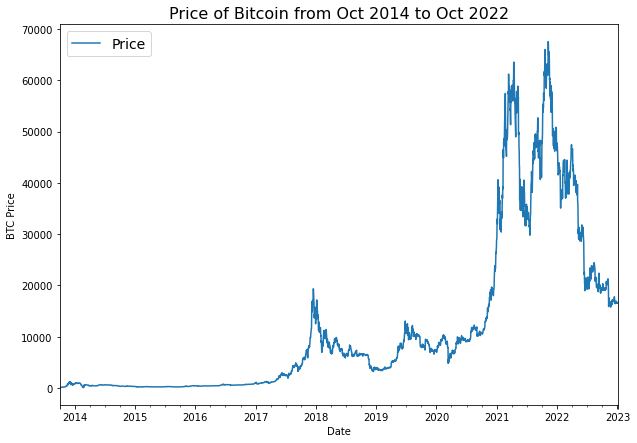

In [17]:
# Visualize closing prices
import matplotlib.pyplot as plt

btc_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from Oct 2014 to Oct 2022', fontsize=16)
plt.legend(fontsize=14);

In [18]:
# Sort ascending order of prices
btc_prices.sort_values('Date', inplace=True)
btc_prices.head()

,Price
Date,
2013-10-01,140.300003
2013-10-02,123.000000
2013-10-03,130.990005
2013-10-04,136.820007
2013-10-05,136.699997


In [19]:
timesteps = btc_prices.index.to_numpy()
prices = btc_prices['Price'].to_numpy()

In [20]:
timesteps, prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2022-12-31T00:00:00.000000000', '2023-01-01T00:00:00.000000000',
        '2023-01-02T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  140.30000305,   123.        ,   130.99000549, ...,
        16537.42773438, 16618.40625   , 16576.24804688]))

In [21]:
# Create sequential splits at a specified point (80% train, 20% test)
split_size = int(.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2704,), (677,), (2704,), (677,))

In [22]:
# Create a helper plotting function
def plot_time_series(timesteps, prices, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], prices[start:end], format, label=label)
    plt.xlabel('Date')
    plt.ylabel('Price')
    if label:
        plt.legend(fontsize=14)

    # Display a grid for easier measurement readings
    plt.grid(True)

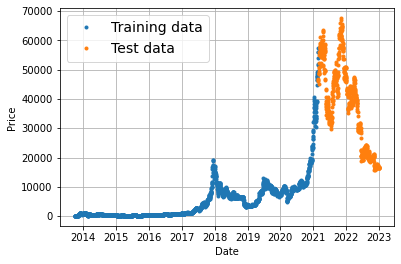

In [23]:
plot_time_series(X_train, y_train, label='Training data')
plot_time_series(X_test, y_test, label='Test data')

### Create windowed train & test sets

**Phase 01 - Horizon 1; Window 7**

In [24]:
# predict 1 step at a time
HORIZON = 1

# use a week worth of timesteps to predict the horizon
WINDOW_SIZE = 7

In [25]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Create a function to make windows across entire time series
def make_windows(x, window_size=7, horizon=1):
    # Create a window of specific window_size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    
    # Create a 2D array of multiple window steps
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    
    windowed_array = x[window_indexes]
    
    windows, labels = get_labelled_windows(windowed_array, horizon)
    return windows, labels

In [27]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

In [28]:
full_windows, full_labels

(array([[  140.30000305,   123.        ,   130.99000549, ...,
           136.69999695,   137.80000305,   135.80000305],
        [  123.        ,   130.99000549,   136.82000732, ...,
           137.80000305,   135.80000305,   136.49000549],
        [  130.99000549,   136.82000732,   136.69999695, ...,
           135.80000305,   136.49000549,   139.5       ],
        ...,
        [16837.23632812, 16831.79296875, 16918.1171875 , ...,
         16546.20703125, 16636.41601562, 16607.19921875],
        [16831.79296875, 16918.1171875 , 16706.07421875, ...,
         16636.41601562, 16607.19921875, 16537.42773438],
        [16918.1171875 , 16706.07421875, 16546.20703125, ...,
         16607.19921875, 16537.42773438, 16618.40625   ]]),
 array([[  136.49000549],
        [  139.5       ],
        [  140.41000366],
        ...,
        [16537.42773438],
        [16618.40625   ],
        [16576.24804688]]))

In [29]:
def make_train_test_splits(windows, labels, test_split=.2):
    split_size = int(len(windows) * (1 - test_split)) # 80%
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [30]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2699, 675, 2699, 675)

### Attempt model training

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    
    # Expand dimensions to align with required input shape
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 rnn (RNN)                   (1, 32)                   5040      
                                                                 
 dense (Dense)               (1, 1)                    33        
                                                                 
Total params: 5,073
Trainable params: 5,073
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(
        learning_rate = .01,
        clipvalue=.5
    ),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

history_1 = model.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
83/83 [==============================] - 10s 59ms/step - loss: nan - mae: nan - mse: nan
Epoch 2/10
83/83 [==============================] - 5s 57ms/step - loss: nan - mae: nan - mse: nan
Epoch 3/10
83/83 [==============================] - 5s 55ms/step - loss: nan - mae: nan - mse: nan
Epoch 4/10
83/83 [==============================] - 4s 54ms/step - loss: nan - mae: nan - mse: nan
Epoch 5/10
83/83 [==============================] - 5s 55ms/step - loss: nan - mae: nan - mse: nan
Epoch 6/10
83/83 [==============================] - 5s 60ms/step - loss: nan - mae: nan - mse: nan
Epoch 7/10
83/83 [==============================] - 5s 56ms/step - loss: nan - mae: nan - mse: nan
Epoch 8/10
83/83 [==============================] - 5s 56ms/step - loss: nan - mae: nan - mse: nan
Epoch 9/10
83/83 [==============================] - 5s 55ms/step - loss: nan - mae: nan - mse: nan
Epoch 10/10
83/83 [==============================] - 5s 56ms/step - loss: nan - mae: nan - mse: nan


Gradient explosion occurs - Add LSTM layer

### Experiments
train for less number of epochs for faster experimentation

**Model 2 - LTS, LSTM - activation tanh**

In [30]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [31]:
model_2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [32]:
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
83/83 [==============================] - 21s 146ms/step - loss: 4372.9141 - mae: 4372.9141 - mse: 43273584.0000
Epoch 2/10
83/83 [==============================] - 11s 139ms/step - loss: 4287.7246 - mae: 4287.7246 - mse: 42528044.0000
Epoch 3/10
83/83 [==============================] - 12s 145ms/step - loss: 4207.5068 - mae: 4207.5068 - mse: 41833844.0000
Epoch 4/10
83/83 [==============================] - 12s 145ms/step - loss: 4145.5225 - mae: 4145.5225 - mse: 41230492.0000
Epoch 5/10
83/83 [==============================] - 12s 139ms/step - loss: 4098.0391 - mae: 4098.0391 - mse: 40693164.0000
Epoch 6/10
83/83 [==============================] - 11s 137ms/step - loss: 4059.2590 - mae: 4059.2590 - mse: 40201160.0000
Epoch 7/10
83/83 [==============================] - 11s 135ms/step - loss: 4031.4204 - mae: 4031.4204 - mse: 39782460.0000
Epoch 8/10
83/83 [==============================] - 12s 139ms/step - loss: 4010.4553 - mae: 4010.4553 - mse: 39411092.0000
Epoch 9/10
83/83

**Model 2 - LTS, LSTM - activation relu**

In [40]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [41]:
model_3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [35]:
history_3 = model_3.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
83/83 [==============================] - 18s 125ms/step - loss: 4036.5979 - mae: 4036.5979 - mse: 34951756.0000
Epoch 2/10
83/83 [==============================] - 10s 126ms/step - loss: 3887.4932 - mae: 3887.4932 - mse: 30614040.0000
Epoch 3/10
83/83 [==============================] - 11s 131ms/step - loss: 3888.0662 - mae: 3888.0662 - mse: 29839728.0000
Epoch 4/10
83/83 [==============================] - 13s 155ms/step - loss: 3893.5405 - mae: 3893.5405 - mse: 31972696.0000
Epoch 5/10
83/83 [==============================] - 10s 125ms/step - loss: 3885.5898 - mae: 3885.5898 - mse: 29777146.0000
Epoch 6/10
83/83 [==============================] - 11s 134ms/step - loss: 3882.2156 - mae: 3882.2156 - mse: 29110770.0000
Epoch 7/10
83/83 [==============================] - 11s 135ms/step - loss: 3891.8828 - mae: 3891.8828 - mse: 33197134.0000
Epoch 8/10
83/83 [==============================] - 11s 127ms/step - loss: 3889.1423 - mae: 3889.1423 - mse: 31033480.0000
Epoch 9/10
83/83

LSTM with ReLU activation performs better - moving forward with ReLU

**Model 3 - Two LTS layers, LSTM**

In [39]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [42]:
model_4.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [43]:
history_4 = model_4.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
83/83 [==============================] - 36s 274ms/step - loss: 4009.9414 - mae: 4009.9414 - mse: 34135700.0000
Epoch 2/10
83/83 [==============================] - 18s 218ms/step - loss: 3893.3445 - mae: 3893.3445 - mse: 32565966.0000
Epoch 3/10
83/83 [==============================] - 18s 214ms/step - loss: 3888.0906 - mae: 3888.0906 - mse: 30409908.0000
Epoch 4/10
83/83 [==============================] - 18s 215ms/step - loss: 3884.8523 - mae: 3884.8523 - mse: 28430382.0000
Epoch 5/10
83/83 [==============================] - 18s 213ms/step - loss: 3890.0063 - mae: 3890.0063 - mse: 30857058.0000
Epoch 6/10
83/83 [==============================] - 18s 215ms/step - loss: 3886.7402 - mae: 3886.7402 - mse: 30942880.0000
Epoch 7/10
83/83 [==============================] - 18s 222ms/step - loss: 3888.2368 - mae: 3888.2368 - mse: 28527480.0000
Epoch 8/10
83/83 [==============================] - 18s 213ms/step - loss: 3891.5120 - mae: 3891.5120 - mse: 32891158.0000
Epoch 9/10
83/83

Seems like more LTC cells do not make a difference

**Model 4 - LTS, Two LSTM layers**

In [44]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu', time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [45]:
model_5.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [46]:
history_5 = model_5.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
83/83 [==============================] - 18s 113ms/step - loss: 5180.6592 - mae: 5180.6592 - mse: 360904064.0000
Epoch 2/10
83/83 [==============================] - 9s 112ms/step - loss: 4230.2700 - mae: 4230.2700 - mse: 40868064.0000
Epoch 3/10
83/83 [==============================] - 9s 115ms/step - loss: 4019.8645 - mae: 4019.8645 - mse: 35986044.0000
Epoch 4/10
83/83 [==============================] - 11s 129ms/step - loss: 3926.8398 - mae: 3926.8398 - mse: 34356900.0000
Epoch 5/10
83/83 [==============================] - 10s 121ms/step - loss: 3920.2937 - mae: 3920.2937 - mse: 32970250.0000
Epoch 6/10
83/83 [==============================] - 10s 115ms/step - loss: 3899.7246 - mae: 3899.7246 - mse: 31049208.0000
Epoch 7/10
83/83 [==============================] - 10s 117ms/step - loss: 3899.9729 - mae: 3899.9729 - mse: 33573732.0000
Epoch 8/10
83/83 [==============================] - 10s 115ms/step - loss: 3896.9729 - mae: 3896.9729 - mse: 29563204.0000
Epoch 9/10
83/83 

More LSTM layers do not make a difference either

**Model 5 - Two LTS layers, Two LSTM layers**

In [47]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu', time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [48]:
model_6.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [49]:
history_6 = model_6.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
83/83 [==============================] - 33s 233ms/step - loss: 5846.9629 - mae: 5846.9629 - mse: 505566240.0000
Epoch 2/10
83/83 [==============================] - 18s 222ms/step - loss: 4698.0308 - mae: 4698.0308 - mse: 205116160.0000
Epoch 3/10
83/83 [==============================] - 19s 224ms/step - loss: 4638.6548 - mae: 4638.6548 - mse: 65713860.0000
Epoch 4/10
83/83 [==============================] - 20s 237ms/step - loss: 4103.3467 - mae: 4103.3467 - mse: 37764920.0000
Epoch 5/10
83/83 [==============================] - 20s 237ms/step - loss: 4125.0063 - mae: 4125.0063 - mse: 38572448.0000
Epoch 6/10
83/83 [==============================] - 19s 226ms/step - loss: 4011.9453 - mae: 4011.9453 - mse: 36266252.0000
Epoch 7/10
83/83 [==============================] - 18s 221ms/step - loss: 3994.3425 - mae: 3994.3425 - mse: 35959420.0000
Epoch 8/10
83/83 [==============================] - 19s 231ms/step - loss: 3927.7908 - mae: 3927.7908 - mse: 32880758.0000
Epoch 9/10
83/

More  of both layers do not make a difference either - return to base

### Tune hyperparameters

Epochs and learning rate can be tuned by keras callbacks. Therefore, only batch size, optimization function, and hidden units are required to tune

**Update hidden units (multiples of 32 are preferred)**

In [59]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [60]:
model_7.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [61]:
history_7 = model_7.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
83/83 [==============================] - 13s 58ms/step - loss: 4224.1118 - mae: 4224.1118 - mse: 40617880.0000
Epoch 2/10
83/83 [==============================] - 5s 59ms/step - loss: 3896.9988 - mae: 3896.9988 - mse: 32355542.0000
Epoch 3/10
83/83 [==============================] - 5s 58ms/step - loss: 3868.4753 - mae: 3868.4753 - mse: 29847568.0000
Epoch 4/10
83/83 [==============================] - 5s 56ms/step - loss: 3895.0820 - mae: 3895.0820 - mse: 34043076.0000
Epoch 5/10
83/83 [==============================] - 5s 56ms/step - loss: 3896.3674 - mae: 3896.3674 - mse: 30391228.0000
Epoch 6/10
83/83 [==============================] - 5s 56ms/step - loss: 3891.5137 - mae: 3891.5137 - mse: 32587410.0000
Epoch 7/10
83/83 [==============================] - 5s 57ms/step - loss: 3887.9116 - mae: 3887.9116 - mse: 30818276.0000
Epoch 8/10
83/83 [==============================] - 5s 56ms/step - loss: 3887.3694 - mae: 3887.3694 - mse: 31876788.0000
Epoch 9/10
83/83 [=============

128 and 32 is very similar - moving forward with 32 as it trains faster

**Update batch size**

In [62]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [63]:
model_8.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [64]:
history_8 = model_8.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=10,
)

Epoch 1/10
21/21 [==============================] - 20s 228ms/step - loss: 4415.4756 - mae: 4415.4756 - mse: 43638328.0000
Epoch 2/10
21/21 [==============================] - 4s 210ms/step - loss: 4337.7793 - mae: 4337.7793 - mse: 42962548.0000
Epoch 3/10
21/21 [==============================] - 4s 207ms/step - loss: nan - mae: nan - mse: nan        
Epoch 4/10
21/21 [==============================] - 4s 207ms/step - loss: nan - mae: nan - mse: nan
Epoch 5/10
21/21 [==============================] - 4s 193ms/step - loss: nan - mae: nan - mse: nan
Epoch 6/10
21/21 [==============================] - 5s 220ms/step - loss: nan - mae: nan - mse: nan
Epoch 7/10
21/21 [==============================] - 5s 222ms/step - loss: nan - mae: nan - mse: nan
Epoch 8/10
21/21 [==============================] - 4s 211ms/step - loss: nan - mae: nan - mse: nan
Epoch 9/10
21/21 [==============================] - 4s 198ms/step - loss: nan - mae: nan - mse: nan
Epoch 10/10
21/21 [============================

Issues with batch size 128, default 32 is better

**Update window size**

In [49]:
HORIZON = 1
WINDOW_SIZE = 30

In [50]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2680, 671, 2680, 671)

In [51]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [52]:
model_9.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [53]:
history_9 = model_9.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
84/84 [==============================] - 12s 56ms/step - loss: 4994.0220 - mae: 4994.0220 - mse: 74743080.0000
Epoch 2/10
84/84 [==============================] - 5s 56ms/step - loss: 4632.9243 - mae: 4632.9243 - mse: 60828820.0000
Epoch 3/10
84/84 [==============================] - 5s 55ms/step - loss: 4623.9263 - mae: 4623.9263 - mse: 60410628.0000
Epoch 4/10
84/84 [==============================] - 5s 61ms/step - loss: 4637.5337 - mae: 4637.5337 - mse: 59740820.0000
Epoch 5/10
84/84 [==============================] - 5s 57ms/step - loss: 4633.1724 - mae: 4633.1724 - mse: 61724464.0000
Epoch 6/10
84/84 [==============================] - 5s 56ms/step - loss: 4622.2690 - mae: 4622.2690 - mse: 60010080.0000
Epoch 7/10
84/84 [==============================] - 5s 58ms/step - loss: 4635.4961 - mae: 4635.4961 - mse: 60839452.0000
Epoch 8/10
84/84 [==============================] - 5s 55ms/step - loss: 4624.0151 - mae: 4624.0151 - mse: 58873680.0000
Epoch 9/10
84/84 [=============

Window size of 7 is better

### Complete training

**Create callback functions**

In [54]:
# Model checkpoint with a specific filename
def create_model_checkpoint(model_name, save_path='model_checkpoints', monitor_dataset_loss=False):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True,
        monitor='loss' if monitor_dataset_loss else 'val_loss',
    )

# Create a tensorboard callback
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
    )

    print(f'Saving TensorBoard log files to: {log_dir}')
    return tensorboard_callback

# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=200,
    restore_best_weights=True
)

# create reduce lr on plateau callback
reduce_lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    patience=100,
    verbose=1
)

In [55]:
HORIZON = 1
WINDOW_SIZE = 7

In [56]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2699, 675, 2699, 675)

In [57]:
model_10 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
], name='model_10')

In [58]:
model_10.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [ ]:
history_10 = model_10.fit(
    train_windows,
    train_labels,
    epochs=5000,
    callbacks=[
        create_model_checkpoint(model_name=model_10.name),
        create_tensorboard_callback(
            dir_name='tensorboard_logs/tensorboard_logs_model_10',
            experiment_name='model_10'
        ),
        early_stopping,
        reduce_lr_plateau,
        
    ]
)